<a href="https://colab.research.google.com/github/francobarrionuevoenv21/ClusteringArroceras_Incendios_SanJavier/blob/main/03_CoverTypes2022_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias

In [ ]:
# Handling, processing and visualization of data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Handling and processing of georreferenced data
import geopandas as gpd

# Other libraries
from google.colab import files
import matplotlib.lines as mlines
import requests
import zipfile
import io

In [ ]:
# Libraries for files loading

# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Procesamiento de los datos

In [ ]:
def FileDataDf(dictFiles, i, source):
  ''' This function allows to open csv files stored either in Google Drive or
  from a device. It takes as input a dictionary containing files link or path
  and the index of the element in the dictionary. It also takes a third
  parameter (source) wich specifies the source of the files'''

  if source == 'gdrive': # Files hosted in Google Drive.
    FilesPath = list(dictFiles.values())[i]
    idPath = FilesPath.split('/', 6)
    downloadedFiles = drive.CreateFile({'id':idPath[5]})
    downloadedFiles.GetContentFile(list(dictFiles.keys())[i])
    dfData = pd.read_csv(list(dictFiles.keys())[i])#, encoding='unicode_escape')

  elif source == 'other': # Files imported from device or Colab files
    dfData = pd.read_csv(list(dictFiles.values())[i], encoding='unicode_escape')

  return dfData

In [ ]:
# NDVI sampleos PPCC-https://drive.google.com/file/d/1i-9HdWr1l6FLgDPyp7Vf26Iv02BzmlAS/view?usp=sharing
dictFilesPath ={
    "1.csv" : "https://drive.google.com/file/d/1i-9HdWr1l6FLgDPyp7Vf26Iv02BzmlAS/view?usp=sharing",
    }

In [ ]:
#listColumns = ['latitude', 'longitude', 'acq_date', 'type']
dfLoaded = FileDataDf(dictFilesPath, 0, source = 'gdrive')#[listColumns] # Select the correct source

dfLoaded = dfLoaded.drop(columns=['system:index', '.geo'])

listDates = list(dfLoaded.columns)
listSamples = list(dfLoaded['Cobertura'])

matrixNDVISamples = dfLoaded.iloc[:, :-1].to_numpy()

matrixNDVISamples = matrixNDVISamples*10000

#-------------------------------------------------------------------------------

dfNDVITransver = pd.DataFrame()

i = 0

for s in listSamples:
  dfNDVITransver[s] = matrixNDVISamples[i, :]
  i += 1

dfNDVITransver['Fecha'] = listDates[:-1]

dfNDVITransver['Fecha'] = pd.to_datetime(dfNDVITransver['Fecha'], format='%Y_%m_%d') #'%m/%d/%Y'

#-------------------------------------------------------------------------------

listSamplesClean = []

for s in listSamples:

  if s[-3] == 'S' or s[-3] == 'M' or s[-3] == 'N':
    listSamplesClean.append(s[:-3])
  else:
    listSamplesClean.append(s[:-2])

listSamplesClean = list(set(listSamplesClean))

<ipython-input-5-036598851df2>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfNDVITransver[s] = matrixNDVISamples[i, :]
<ipython-input-5-036598851df2>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfNDVITransver[s] = matrixNDVISamples[i, :]
<ipython-input-5-036598851df2>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

## Graficos EDA

In [ ]:
listSamplesClean

['Estero o bañados',
 'Parcelas A-G',
 'Sabanas',
 'Pastizales',
 'Forestal',
 'Arroceras',
 'Bosque']

BosqueN
0


<ipython-input-16-fc59d8b3448d>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)


BosqueM
1
BosqueS
2


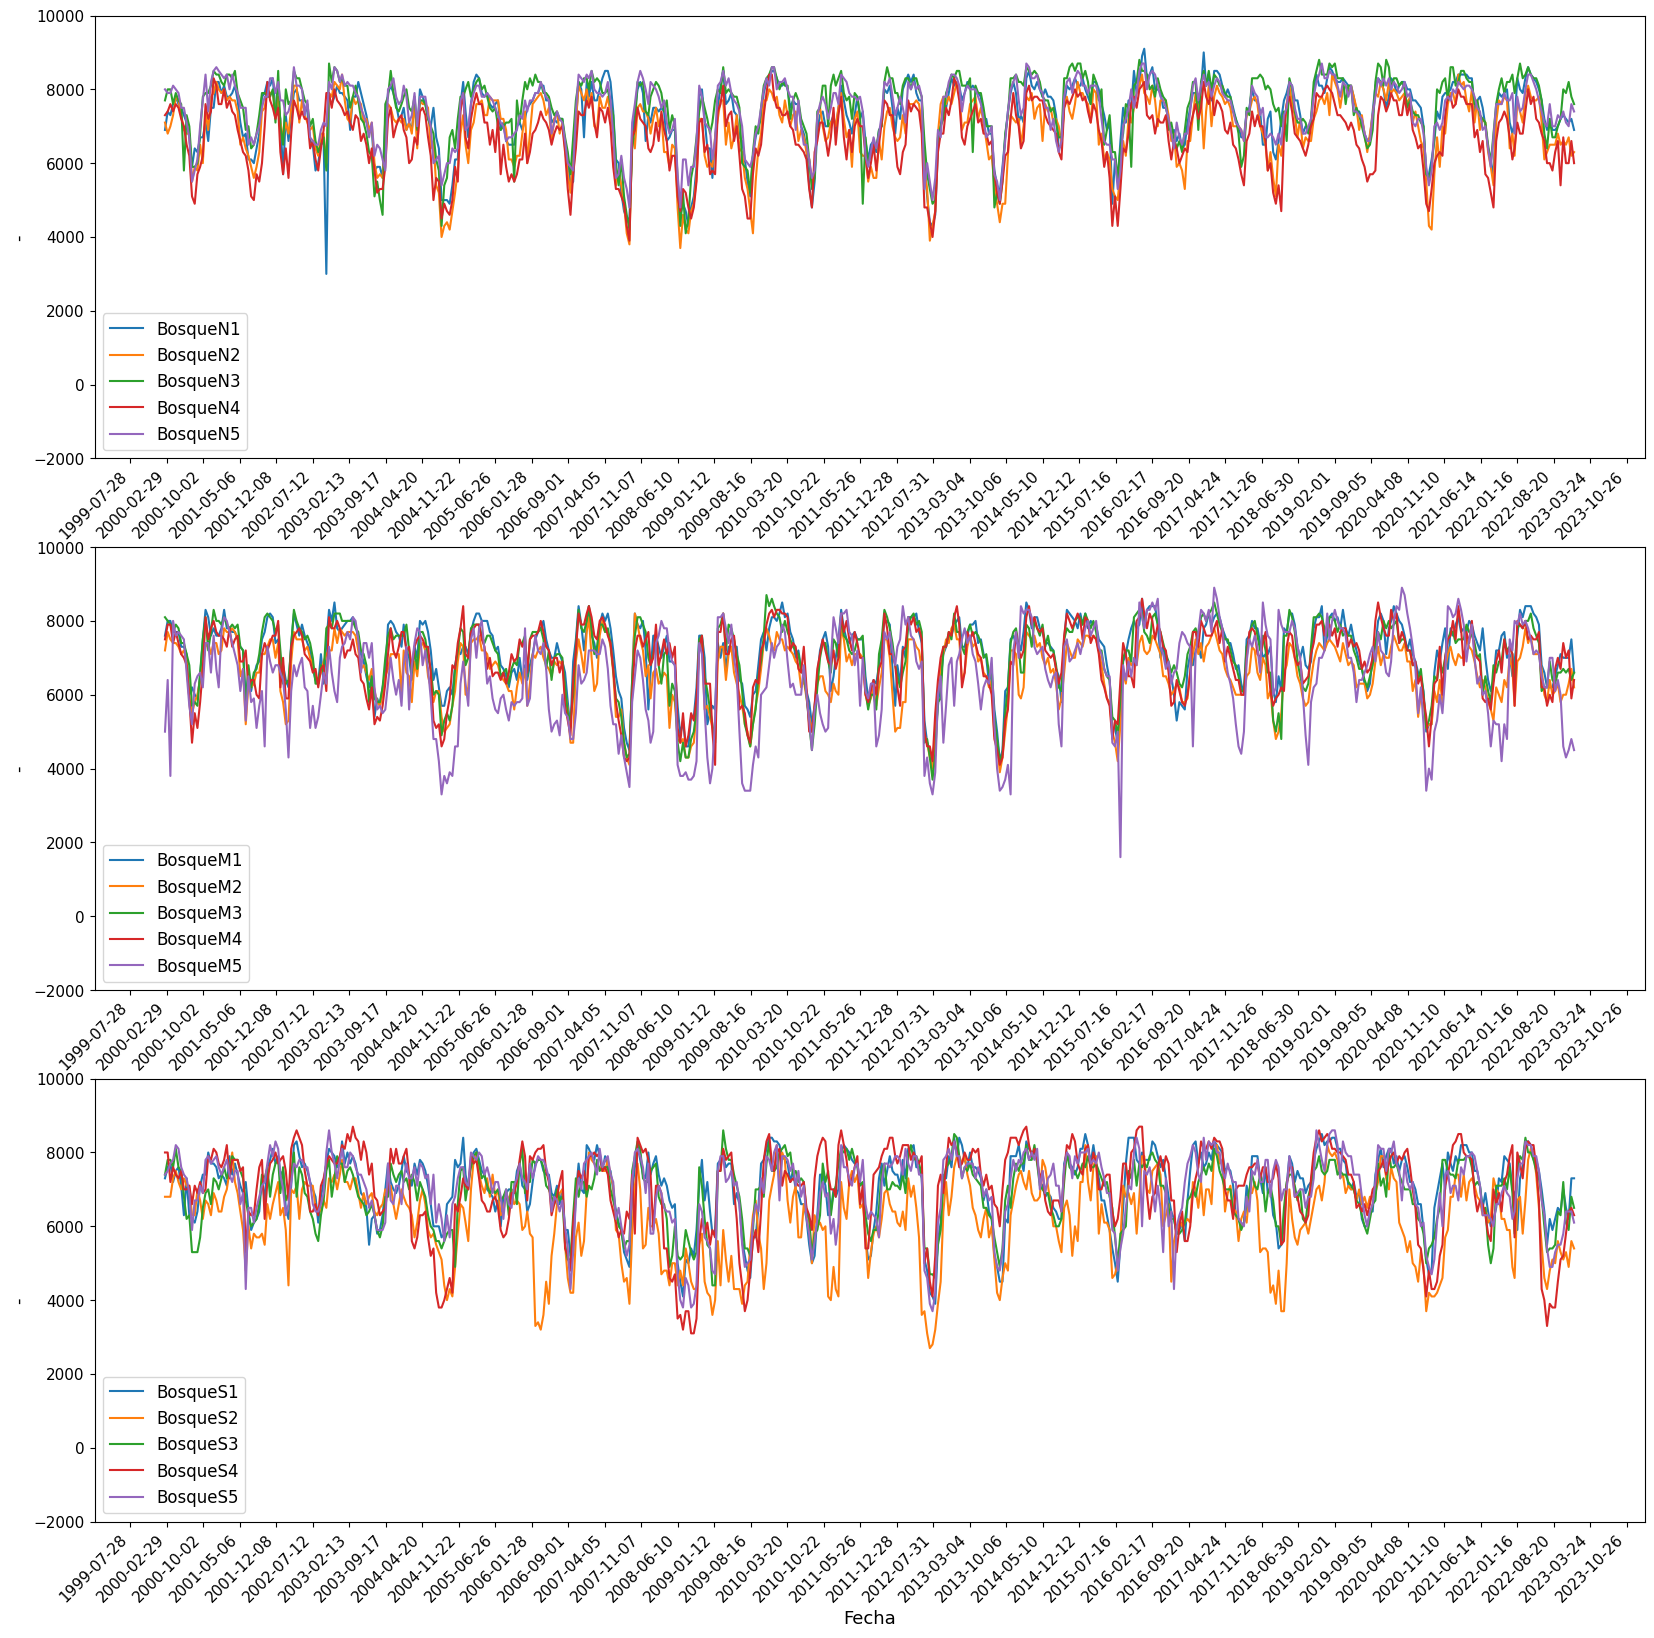

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(20, 6.52*3))#, sharex=True)

s = 6 # Posicion en la lista listSamplesClean

pos = 0
for z in ['N', 'M', 'S']:
  print(f'{listSamplesClean[s]}{z}')
  dfNDVITransverFilt = dfNDVITransver.filter(like=f'{listSamplesClean[s]}{z}')#.plot()
  #dfFiltCol = dfNDVITransverFilt.columns
  print(pos)
  for subS in list(dfNDVITransverFilt.columns):
    axs[pos].plot(dfNDVITransver['Fecha'], np.array(dfNDVITransverFilt[subS]),
        #color='firebrick',
        label=subS)

    axs[pos].set_ylabel('-', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
    axs[pos].set_xlabel('Fecha', fontsize=13)
    axs[pos].legend(fontsize=12, loc='best')

    # Adjust the frequency of x-axis ticks
    axs[pos].xaxis.set_major_locator(plt.MultipleLocator(base=24*9))  # Adjust to desired frequency
    axs[pos].set_xticklabels(axs[pos].get_xticklabels(), rotation=45, ha='right', fontsize=10)
    axs[pos].tick_params(axis='both', labelsize=11)

    #axs[pos].set_xlim([-2000, 10000])
    axs[pos].set_ylim([-2000, 10000])

  pos += 1

plt.show()

## Analisis especifico-Arroceras N-Oct-2010 a Feb-2016

<ipython-input-10-bc2bc4c92cc6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=10)


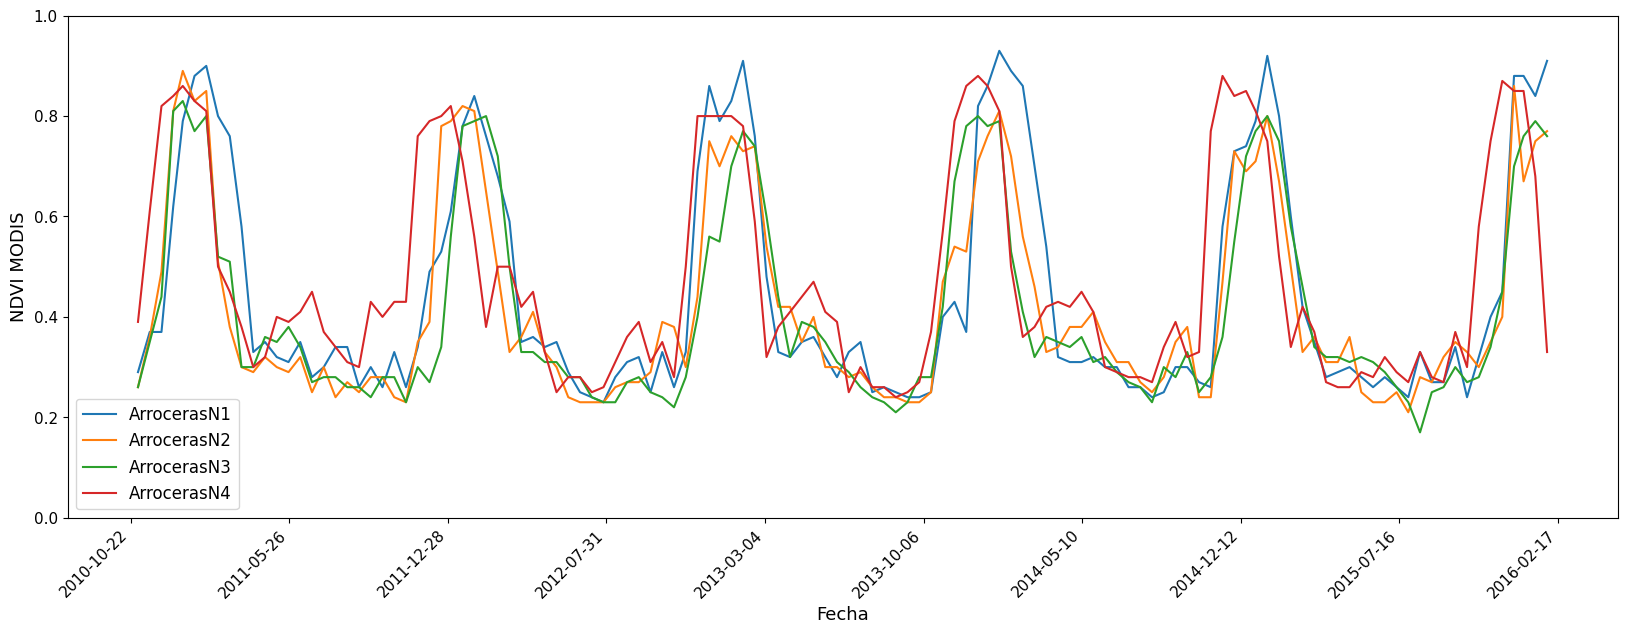

In [ ]:
listArrocN = ['ArrocerasN1', 'ArrocerasN2', 'ArrocerasN3', 'ArrocerasN4']
startDateAN = '2010-10-22'
endDateAN = '2016-02-17'

dfNDVITransverFilt01 = dfNDVITransver.copy()

dfNDVITransverFilt01 = dfNDVITransverFilt01[(dfNDVITransverFilt01['Fecha'] >= startDateAN) & (dfNDVITransverFilt01['Fecha'] <= endDateAN)]

fig, axs = plt.subplots(figsize=(20, 6.52))#, sharex=True)

for subS in list(listArrocN):
  axs.plot(dfNDVITransverFilt01['Fecha'],
    np.array(dfNDVITransverFilt01[subS])/10000, # Normalizo
    label=subS)

  axs.set_ylabel('NDVI MODIS', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
  axs.set_xlabel('Fecha', fontsize=13)
  axs.legend(fontsize=12, loc='best')

  # Adjust the frequency of x-axis ticks
  axs.xaxis.set_major_locator(plt.MultipleLocator(base=24*9))  # Adjust to desired frequency
  axs.set_xticklabels(axs.get_xticklabels(), rotation=45, ha='right', fontsize=10)
  axs.tick_params(axis='both', labelsize=11)

  #axs[pos].set_xlim([-2000, 10000])
  axs.set_ylim([0, 1])

plt.show()

In [ ]:
dfNDVITransverFilt01MV = dfNDVITransverFilt01[listArrocN].copy()
listFechas = dfNDVITransverFilt01['Fecha'].astype('str')

listMeses = [int(f[5:7]) for f in listFechas]

dfMeanNDVIxMM = pd.DataFrame()

dfMeanNDVIxMM['MeanNDVI'] = np.mean(dfNDVITransverFilt01MV.to_numpy(), axis=1)
dfMeanNDVIxMM['Mes'] = [int(f[5:7]) for f in listFechas]

In [ ]:
listMeanNDVIVal = []

for m in range(1, 13):
  listMeanNDVIVal.append(dfMeanNDVIxMM[dfMeanNDVIxMM['Mes']==m]['MeanNDVI'].mean())

In [ ]:
listMeanNDVIVal

[7843.75,
 6740.909090909091,
 4510.0,
 3457.5,
 3392.5,
 2972.5,
 2692.5,
 2702.5,
 2982.5,
 2962.5,
 4238.636363636364,
 6656.25]

In [ ]:
listMeanNDVIVal[0]-listMeanNDVIVal[7]

5141.25

<ipython-input-68-507677ca43e1>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(), rotation=0, ha='right', fontsize=11)


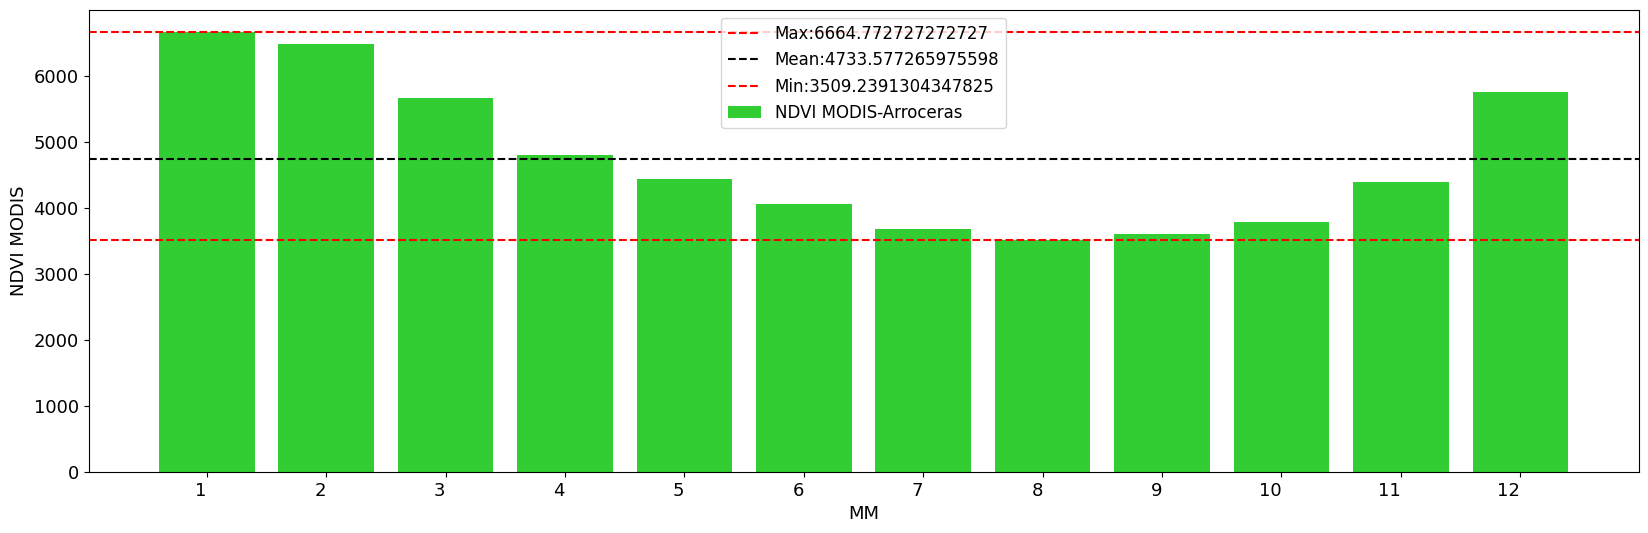

In [ ]:
fig, axs = plt.subplots(figsize=(20, 6))#, sharex=True)

axs.bar([m for m in range(1, 13)], np.array(listMeanNDVIVal),
        color='limegreen',
        width =0.8,
        label='NDVI MODIS-Arroceras')

axs.set_ylabel('NDVI MODIS', fontsize=13)#'Burned area ['+r'$km^2$'+']', fontsize=15)
axs.set_xlabel('MM', fontsize=13)
#axs.legend(fontsize=12)

axs.axhline(y=np.array(listMeanNDVIVal).max(), label=f'Max:{np.array(listMeanNDVIVal).max()}',color='red', linestyle='--')
axs.axhline(y=np.array(listMeanNDVIVal).mean(), label=f'Mean:{np.array(listMeanNDVIVal).mean()}',color='black', linestyle='--')
axs.axhline(y=np.array(listMeanNDVIVal).min(), label=f'Min:{np.array(listMeanNDVIVal).min()}',color='red', linestyle='--')


axs.legend(fontsize=12)
# Adjust the frequency of x-axis ticks
axs.xaxis.set_major_locator(plt.MultipleLocator(base=1))  # Adjust to desired frequency
axs.set_xticklabels(axs.get_xticklabels(), rotation=0, ha='right', fontsize=11)
axs.tick_params(axis='both', labelsize=13)

plt.show()

In [ ]:
data = dfNDVITransverFilt01MV.to_numpy().flatten()

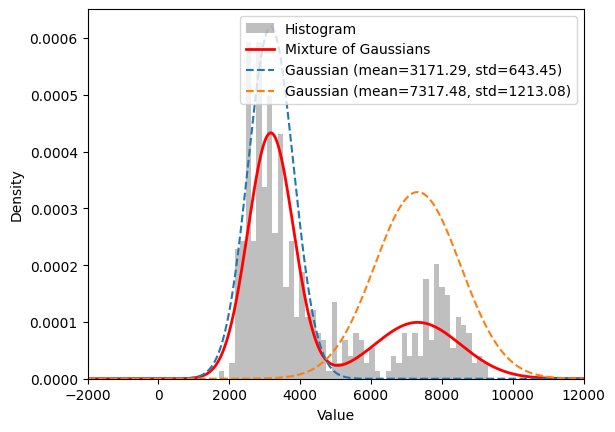

Component 1: Mean = 3171.29, Standard Deviation = 643.45
Component 2: Mean = 7317.48, Standard Deviation = 1213.08


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# Assuming your data is stored in a variable named 'data'
# Fit a mixture of two Gaussian distributions to the data
gmm = GaussianMixture(n_components=2)
gmm.fit(data.reshape(-1, 1))  # Reshape the data if it's 1D

# Get the parameters of the fitted distributions
means = gmm.means_.flatten()
stds = np.sqrt(gmm.covariances_).flatten()

# Plot the histogram of the data and the fitted distributions
plt.hist(data, bins=50, density=True, alpha=0.5, color='gray', label='Histogram')
x = np.linspace(-2000, 12000, 1000)
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))
plt.plot(x, pdf, color='red', lw=2, label='Mixture of Gaussians')
for mean, std in zip(means, stds):
    plt.plot(x, norm.pdf(x, mean, std), '--', label=f'Gaussian (mean={mean:.2f}, std={std:.2f})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='best')
plt.xlim(-2000,12000)
plt.show()

# Print the mean values and standard deviations for each component
for i, (mean, std) in enumerate(zip(means, stds)):
    print(f'Component {i + 1}: Mean = {mean:.2f}, Standard Deviation = {std:.2f}')
